In [ ]:
import pickle
import matplotlib.pyplot as plt
import json
import networkx as nx
import pandas as pd
import numpy as np
from dwave.system import DWaveSampler, FixedEmbeddingComposite
import dwave.inspector

from plotters import plotHistogram, annotateSampleGraph, plotCSV, plotSampleGraph, plotArrangement
from qubo import createBQM
from sampleAnalysis import duplicates, findOverlaps, totalEntropy

identifier = "Haydn-3"
path = f"../Pickles/{identifier}/{identifier}_"

instruments = json.load(open(path + "instruments.json"))
phrases = pickle.load(open(path + "phrases.pkl", "rb"))
G = nx.read_graphml(path + "graph.graphml")
embedding = json.load(open(path + "embedding.json", "r"))
qa = FixedEmbeddingComposite(DWaveSampler(), embedding)

In [6]:
reads = 1000

bqm = createBQM(G, phrases, instruments, 6, 6, 1)
sampleset = qa.sample(bqm, num_reads=reads, label=f"Haydn_{reads}")

31.67529278103625
0.0


Serving Inspector on http://127.0.0.1:18000/?problemId=2afaf32e-ef8a-45f3-9792-1f8f475a4479

'http://127.0.0.1:18000/?problemId=2afaf32e-ef8a-45f3-9792-1f8f475a4479'

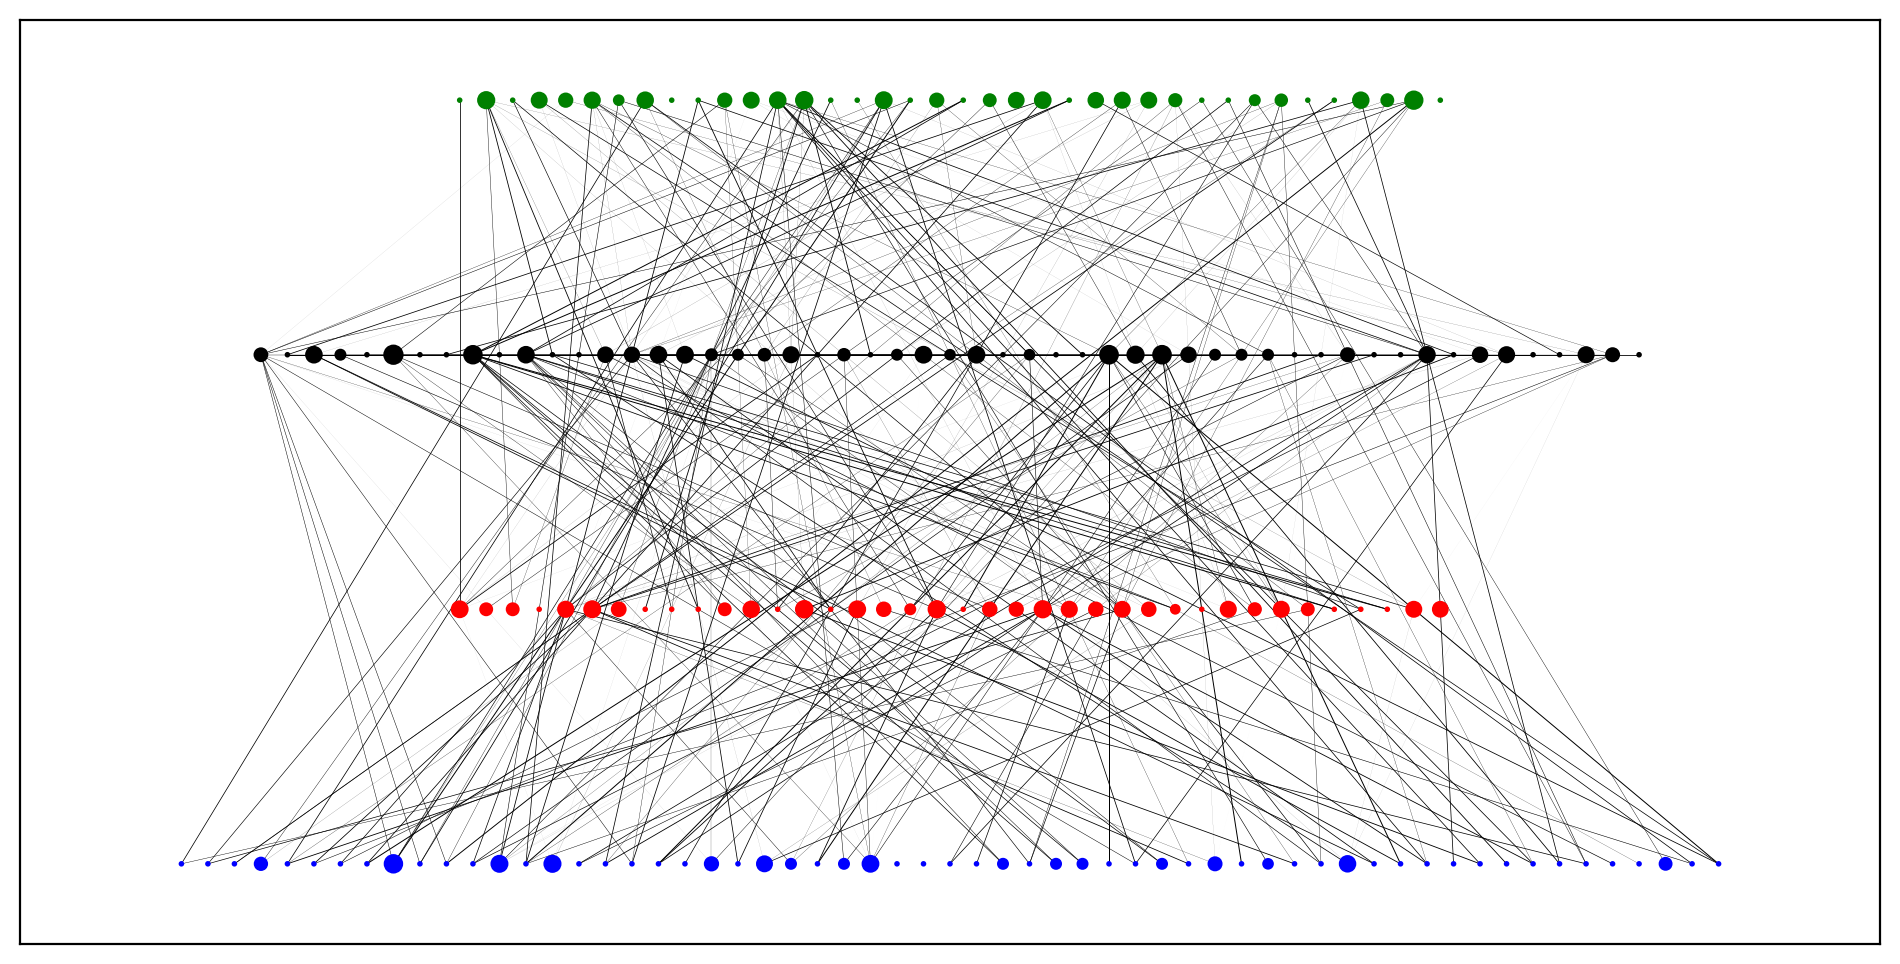

In [13]:
print(sampleset.info["embedding_context"]["chain_strength"])
print(sampleset.first.chain_break_fraction)
plotSampleGraph(sampleset.first.sample, G, instruments)

dwave.inspector.show(sampleset)

In [22]:
def recordChainStrength(strengthRange, bqm, filepath: str):
    
    file = pd.DataFrame()
    reads = 1000

    for s in strengthRange:
        sampleset = qa.sample(bqm, num_reads=reads, chain_strength=s, label=f"{identifier}_cs={s}")
        sample = sampleset.first

        A = annotateSampleGraph(sample.sample, G)

        new_row = pd.DataFrame({
            "Chain strength": [sampleset.info["embedding_context"]["chain_strength"]],
            "Total reads": [reads],
            "Time": [sampleset.info["timing"]["qpu_access_time"]],
            "Chain break fraction": [sample.chain_break_fraction],
            "Lowest energy": [bqm.energy(sample.sample)],
            "Total entropy": [totalEntropy(A)],
            "Overlaps": [findOverlaps(annotateSampleGraph(sample.sample, G))],
            "Duplicates": [len(duplicates(sample.sample, G))]
            })
    
        print(f"Chain strength {s} recorded!")
        file = pd.concat([file, new_row])

    file.to_csv(filepath, index=False, mode="a", header=False)


chainStrengths = range(12,42)
bqm = createBQM(G, phrases, instruments, 6, 6, 1)
recordChainStrength(chainStrengths, bqm, path+"chain-strength.csv")

Chain strength 12 recorded!
Chain strength 13 recorded!
Chain strength 14 recorded!
Chain strength 15 recorded!
Chain strength 16 recorded!
Chain strength 17 recorded!
Chain strength 18 recorded!
Chain strength 19 recorded!
Chain strength 20 recorded!
Chain strength 21 recorded!
Chain strength 22 recorded!
Chain strength 23 recorded!
Chain strength 24 recorded!
Chain strength 25 recorded!
Chain strength 26 recorded!
Chain strength 27 recorded!
Chain strength 28 recorded!
Chain strength 29 recorded!
Chain strength 30 recorded!
Chain strength 31 recorded!
Chain strength 32 recorded!
Chain strength 33 recorded!
Chain strength 34 recorded!
Chain strength 35 recorded!
Chain strength 36 recorded!
Chain strength 37 recorded!
Chain strength 38 recorded!
Chain strength 39 recorded!
Chain strength 40 recorded!
Chain strength 41 recorded!


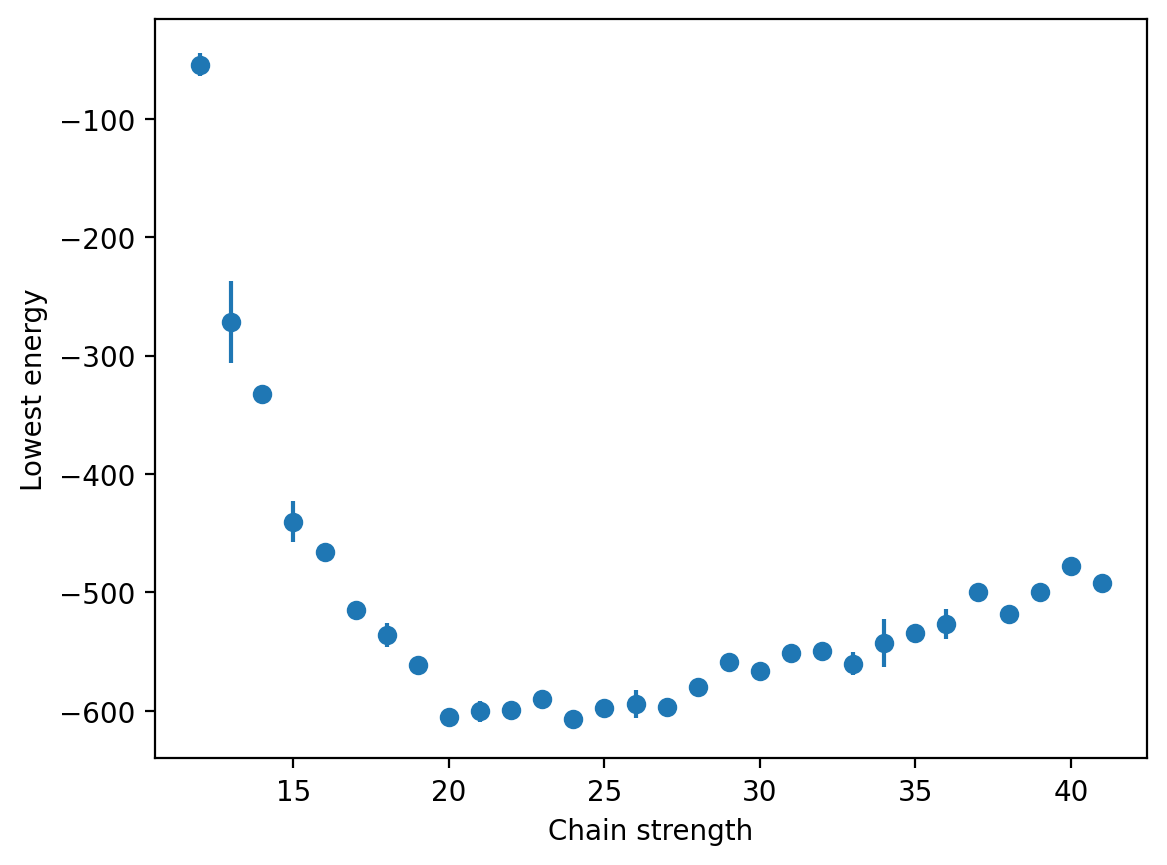

In [37]:
plotCSV(path+"chain-strength.csv", "Chain strength", "Lowest energy")
#plt.vlines(31.675,0,.1)